In [1]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_ComplexStew/'

In [3]:
final_df=pd.read_csv('ComplexStew_MS_PerStep.csv')

In [4]:
filtered_tomato = final_df[final_df['Step'].str.strip() == 'Add Tomtato']
filtered_tomato = filtered_tomato[~filtered_tomato['Participant'].isin(['C010', 'C022', 'C030'])]
filtered_tomato
#C029 is not included

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
5,C002,28,Add Tomtato,484.808395,662.174721,447.707068,451.546312,611.794963,2483.162082,1970.630517,1292.022854
15,C004,30,Add Tomtato,369.266755,504.991223,629.273380,580.831621,821.496227,984.074168,467.556067,553.625484
24,C005,46,Add Tomtato,384.638898,442.044766,709.030236,512.652148,803.767682,1303.964618,328.266407,185.133009
35,C011,34,Add Tomtato,326.118989,391.659337,443.914535,366.275233,436.244639,1767.014162,1041.087015,691.517254
42,C014,32,Add Tomtato,414.719929,496.263659,639.805473,536.036645,701.479294,1710.779073,1286.446286,940.914116
52,C015,33,Add Tomtato,518.639895,629.785955,857.309903,728.891950,914.524496,1572.341149,1079.360173,811.571043
62,C018,50,Add Tomtato,736.712759,626.404064,441.994578,450.783926,536.759991,1859.820871,1210.445885,892.544275
72,C019,40,Add Tomtato,260.648946,354.727375,182.358952,217.255372,137.192101,1139.756740,919.206474,586.956247
86,C023,52,Add Tomtato,537.542271,665.137118,780.193830,728.078605,666.732741,1764.158239,1386.871638,1048.351633
96,C026,33,Add Tomtato,237.631869,436.841251,220.550201,287.905830,141.918255,1442.885913,1778.344727,774.524017


In [5]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_tomato = filtered_tomato.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_tomato.select_dtypes(include=['float64', 'int64']).columns
filtered_tomato[numerical_cols] = filtered_tomato[numerical_cols].replace(0, np.nan)

filtered_tomato[numerical_cols] = imputer.fit_transform(filtered_tomato[numerical_cols])
filtered_tomato

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
5,C002,28.0,Add Tomtato,484.808395,662.174721,447.707068,451.546312,611.794963,2483.162082,1970.630517,1292.022854
15,C004,30.0,Add Tomtato,369.266755,504.991223,629.273380,580.831621,821.496227,984.074168,467.556067,553.625484
24,C005,46.0,Add Tomtato,384.638898,442.044766,709.030236,512.652148,803.767682,1303.964618,328.266407,185.133009
35,C011,34.0,Add Tomtato,326.118989,391.659337,443.914535,366.275233,436.244639,1767.014162,1041.087015,691.517254
42,C014,32.0,Add Tomtato,414.719929,496.263659,639.805473,536.036645,701.479294,1710.779073,1286.446286,940.914116
52,C015,33.0,Add Tomtato,518.639895,629.785955,857.309903,728.891950,914.524496,1572.341149,1079.360173,811.571043
62,C018,50.0,Add Tomtato,736.712759,626.404064,441.994578,450.783926,536.759991,1859.820871,1210.445885,892.544275
72,C019,40.0,Add Tomtato,260.648946,354.727375,182.358952,217.255372,137.192101,1139.756740,919.206474,586.956247
86,C023,52.0,Add Tomtato,537.542271,665.137118,780.193830,728.078605,666.732741,1764.158239,1386.871638,1048.351633
96,C026,33.0,Add Tomtato,237.631869,436.841251,220.550201,287.905830,141.918255,1442.885913,1778.344727,774.524017


In [6]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Add Tomato',
    'HeadCamera Distance': 'HeadCamera Distance - Add Tomato',
    'LeftElbow Distance': 'LeftElbow Distance - Add Tomato',
    'LeftShoulder Distance': 'LeftShoulder Distance - Add Tomato',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Add Tomato',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Add Tomato',
    'RightElbow Distance': 'RightElbow Distance - Add Tomato',
    'RightShoulder Distance': 'RightShoulder Distance - Add Tomato'
}

# Rename columns
filtered_tomato = filtered_tomato.rename(columns=new_column_names)
filtered_tomato

,Participant,Block Design Raw Score,Step,Chest Distance - Add Tomato,HeadCamera Distance - Add Tomato,LeftElbow Distance - Add Tomato,LeftShoulder Distance - Add Tomato,MotionControllerLeft Distance - Add Tomato,MotionControllerRight Distance - Add Tomato,RightElbow Distance - Add Tomato,RightShoulder Distance - Add Tomato
5,C002,28.0,Add Tomtato,484.808395,662.174721,447.707068,451.546312,611.794963,2483.162082,1970.630517,1292.022854
15,C004,30.0,Add Tomtato,369.266755,504.991223,629.273380,580.831621,821.496227,984.074168,467.556067,553.625484
24,C005,46.0,Add Tomtato,384.638898,442.044766,709.030236,512.652148,803.767682,1303.964618,328.266407,185.133009
35,C011,34.0,Add Tomtato,326.118989,391.659337,443.914535,366.275233,436.244639,1767.014162,1041.087015,691.517254
42,C014,32.0,Add Tomtato,414.719929,496.263659,639.805473,536.036645,701.479294,1710.779073,1286.446286,940.914116
52,C015,33.0,Add Tomtato,518.639895,629.785955,857.309903,728.891950,914.524496,1572.341149,1079.360173,811.571043
62,C018,50.0,Add Tomtato,736.712759,626.404064,441.994578,450.783926,536.759991,1859.820871,1210.445885,892.544275
72,C019,40.0,Add Tomtato,260.648946,354.727375,182.358952,217.255372,137.192101,1139.756740,919.206474,586.956247
86,C023,52.0,Add Tomtato,537.542271,665.137118,780.193830,728.078605,666.732741,1764.158239,1386.871638,1048.351633
96,C026,33.0,Add Tomtato,237.631869,436.841251,220.550201,287.905830,141.918255,1442.885913,1778.344727,774.524017


In [7]:
tracker_columns = ['Chest Distance - Add Tomato', 'HeadCamera Distance - Add Tomato', 'LeftElbow Distance - Add Tomato', 'LeftShoulder Distance - Add Tomato',
                   'RightElbow Distance - Add Tomato', 'RightShoulder Distance - Add Tomato', 'MotionControllerLeft Distance - Add Tomato',
                   'MotionControllerRight Distance - Add Tomato']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_tomato, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_tomato[block_design_col], filtered_tomato[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_tomato, tracker_columns, block_design_col)
correlation_df


,Tracker,Correlation,P-value
0,Chest Distance - Add Tomato,0.550877,0.063417
1,HeadCamera Distance - Add Tomato,0.196147,0.541214
2,LeftElbow Distance - Add Tomato,0.101576,0.753434
3,LeftShoulder Distance - Add Tomato,0.112084,0.728736
4,RightElbow Distance - Add Tomato,-0.105079,0.745177
5,RightShoulder Distance - Add Tomato,0.059545,0.854155
6,MotionControllerLeft Distance - Add Tomato,-0.273205,0.390234
7,MotionControllerRight Distance - Add Tomato,0.206655,0.519302


In [8]:
#filtered_tomato.to_csv('ComplexStew_AddTomato.csv',index=False)

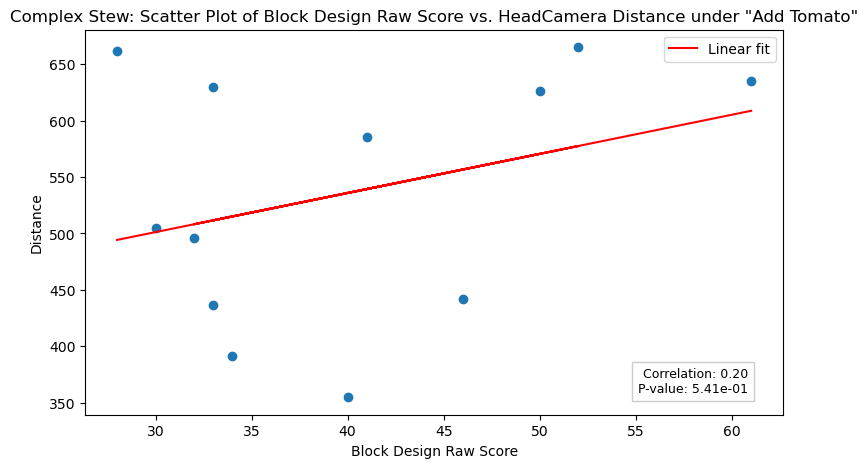

In [16]:
correlation, p_value = spearmanr(filtered_tomato['Block Design Raw Score'], filtered_tomato['HeadCamera Distance - Add Tomato'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_tomato['Block Design Raw Score'], filtered_tomato['HeadCamera Distance - Add Tomato'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_tomato['Block Design Raw Score'], filtered_tomato['HeadCamera Distance - Add Tomato'], 1)
fit_line = slope * filtered_tomato['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_tomato['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. HeadCamera Distance under "Add Tomato"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '33 CS_TomatoDistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

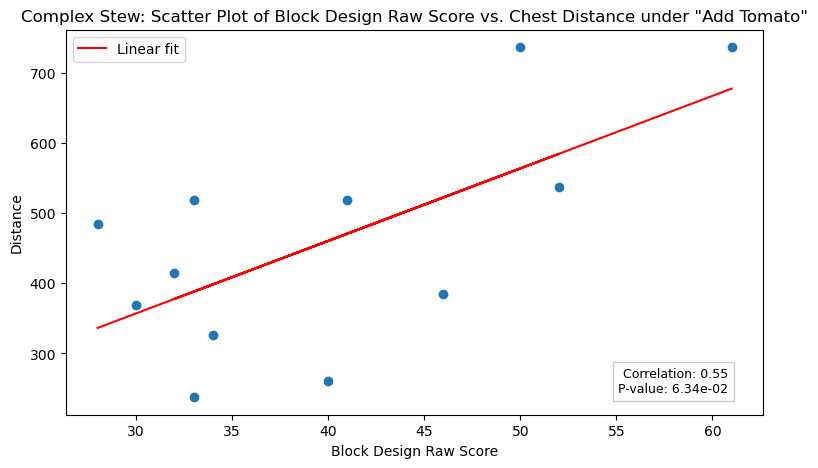

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

correlation, p_value = spearmanr(filtered_tomato['Block Design Raw Score'], filtered_tomato['Chest Distance - Add Tomato'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_tomato['Block Design Raw Score'], filtered_tomato['Chest Distance - Add Tomato'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_tomato['Block Design Raw Score'], filtered_tomato['Chest Distance - Add Tomato'], 1)
fit_line = slope * filtered_tomato['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_tomato['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. Chest Distance under "Add Tomato"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '34 CS_TomatoDistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

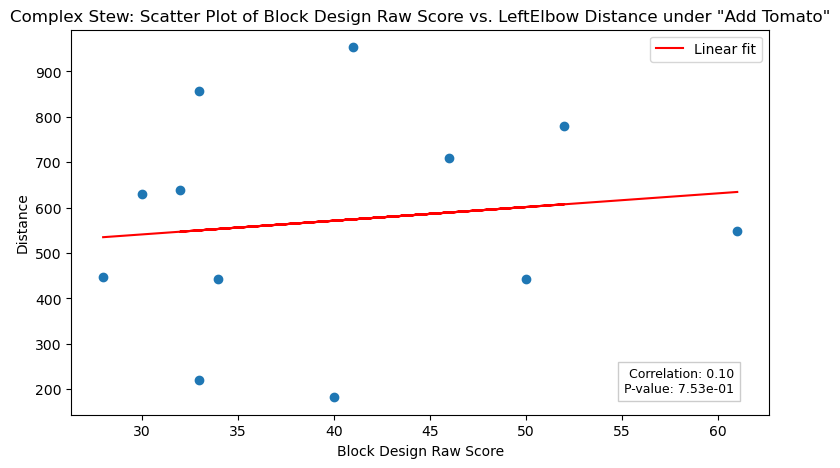

In [15]:
correlation, p_value = spearmanr(filtered_tomato['Block Design Raw Score'], filtered_tomato['LeftElbow Distance - Add Tomato'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_tomato['Block Design Raw Score'], filtered_tomato['LeftElbow Distance - Add Tomato'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_tomato['Block Design Raw Score'], filtered_tomato['LeftElbow Distance - Add Tomato'], 1)
fit_line = slope * filtered_tomato['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_tomato['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. LeftElbow Distance under "Add Tomato"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '35 CS_TomatoDistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

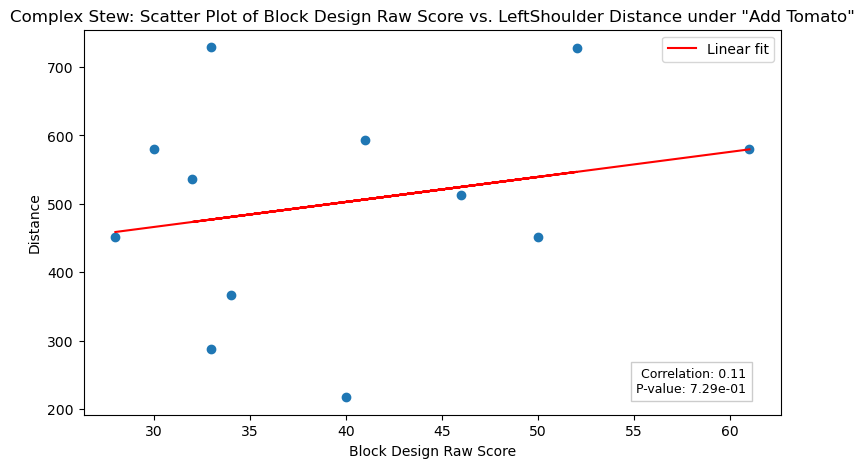

In [14]:
correlation, p_value = spearmanr(filtered_tomato['Block Design Raw Score'], filtered_tomato['LeftShoulder Distance - Add Tomato'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_tomato['Block Design Raw Score'], filtered_tomato['LeftShoulder Distance - Add Tomato'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_tomato['Block Design Raw Score'], filtered_tomato['LeftShoulder Distance - Add Tomato'], 1)
fit_line = slope * filtered_tomato['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_tomato['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. LeftShoulder Distance under "Add Tomato"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '36 CS_TomatoDistanceLeftShoulder.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

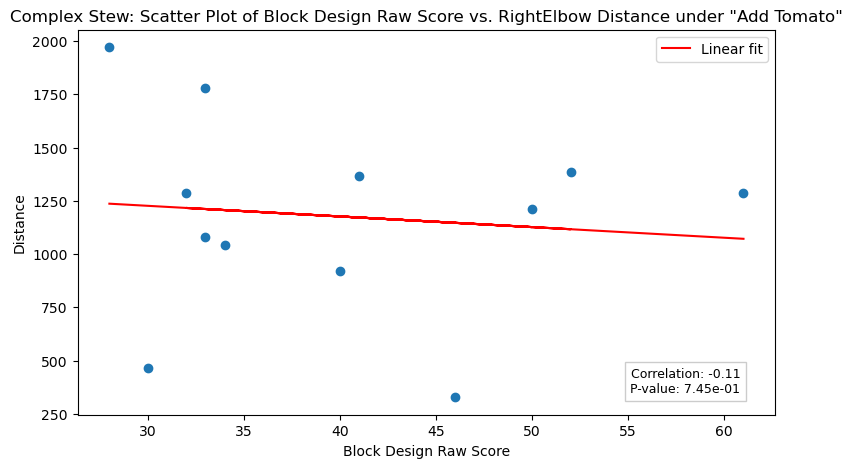

In [18]:
correlation, p_value = spearmanr(filtered_tomato['Block Design Raw Score'], filtered_tomato['RightElbow Distance - Add Tomato'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_tomato['Block Design Raw Score'], filtered_tomato['RightElbow Distance - Add Tomato'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_tomato['Block Design Raw Score'], filtered_tomato['RightElbow Distance - Add Tomato'], 1)
fit_line = slope * filtered_tomato['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_tomato['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. RightElbow Distance under "Add Tomato"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


#file_path = os.path.join(folder_path, '36 CS_TomatoDistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

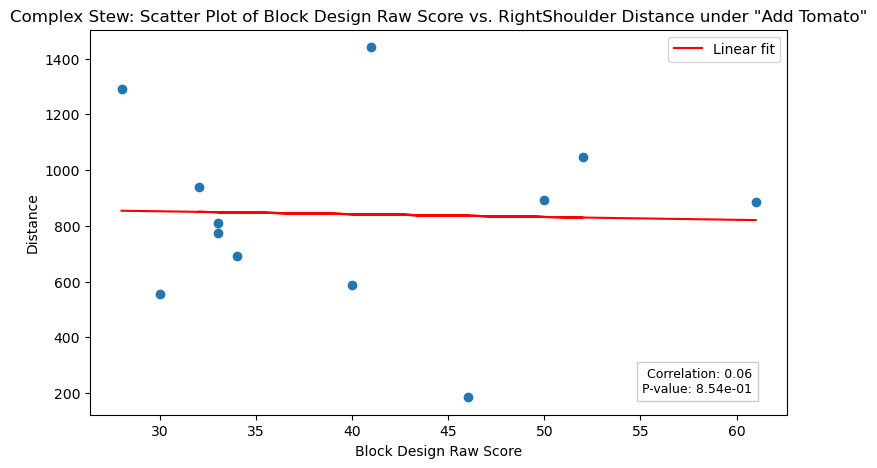

In [19]:
correlation, p_value = spearmanr(filtered_tomato['Block Design Raw Score'], filtered_tomato['RightShoulder Distance - Add Tomato'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_tomato['Block Design Raw Score'], filtered_tomato['RightShoulder Distance - Add Tomato'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_tomato['Block Design Raw Score'], filtered_tomato['RightShoulder Distance - Add Tomato'], 1)
fit_line = slope * filtered_tomato['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_tomato['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. RightShoulder Distance under "Add Tomato"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


#file_path = os.path.join(folder_path, '36 CS_TomatoDistanceRightShoulder.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

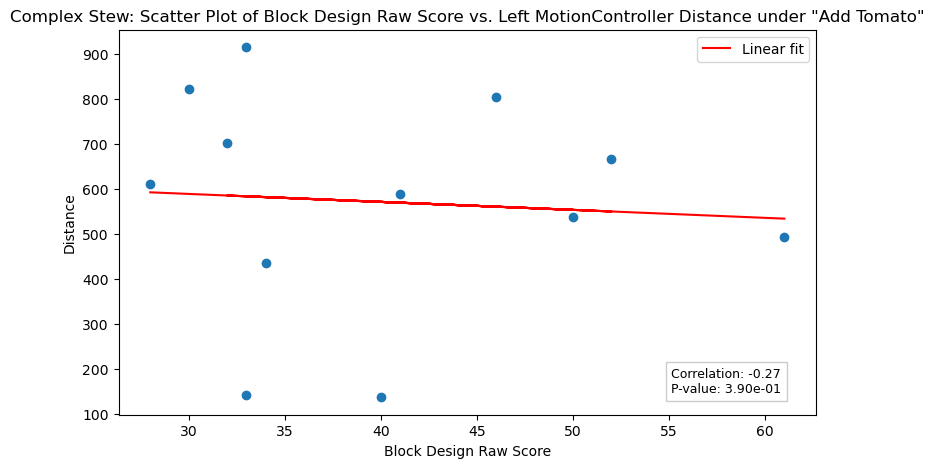

In [20]:
correlation, p_value = spearmanr(filtered_tomato['Block Design Raw Score'], filtered_tomato['MotionControllerLeft Distance - Add Tomato'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_tomato['Block Design Raw Score'], filtered_tomato['MotionControllerLeft Distance - Add Tomato'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_tomato['Block Design Raw Score'], filtered_tomato['MotionControllerLeft Distance - Add Tomato'], 1)
fit_line = slope * filtered_tomato['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_tomato['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. Left MotionController Distance under "Add Tomato"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '37 CS_TomatoDistanceLeftContrl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

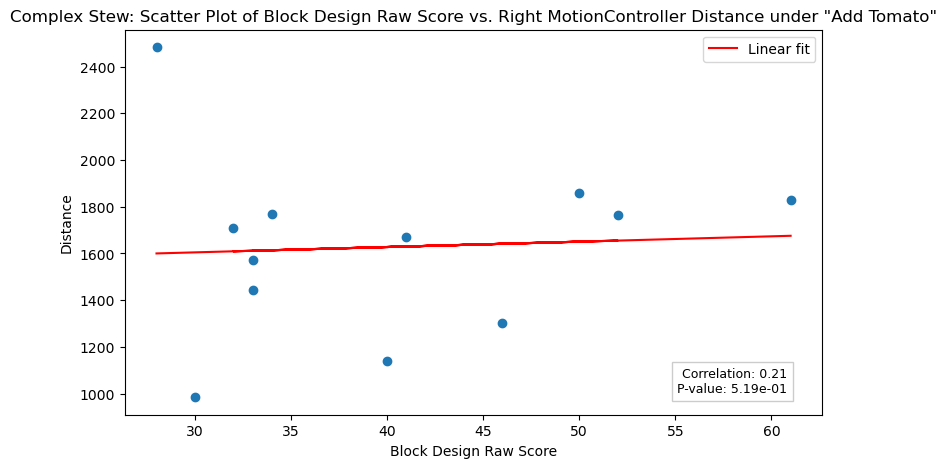

In [21]:
correlation, p_value = spearmanr(filtered_tomato['Block Design Raw Score'], filtered_tomato['MotionControllerRight Distance - Add Tomato'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_tomato['Block Design Raw Score'], filtered_tomato['MotionControllerRight Distance - Add Tomato'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_tomato['Block Design Raw Score'], filtered_tomato['MotionControllerRight Distance - Add Tomato'], 1)
fit_line = slope * filtered_tomato['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_tomato['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. Right MotionController Distance under "Add Tomato"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '38 CS_TomatoDistanceRightContrl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()